# Image Segmentation : Shelter Map Identification

In [8]:
import platform
print('Running on python version:',platform.python_version())

import os
import numpy as np
import train as T
import predict as P
from preprocessing.data import create_train_data, create_test_data
from resources.plot_results import plot_loss_epoch

Running on python version: 3.6.6


In [9]:
data_path = '/Users/rizki/Documents/Projects/ShelterSegmentation_take2/shelterdata_forTESTING/180505_v1' 

Creating training images...
Dataset size: 10
sample data:


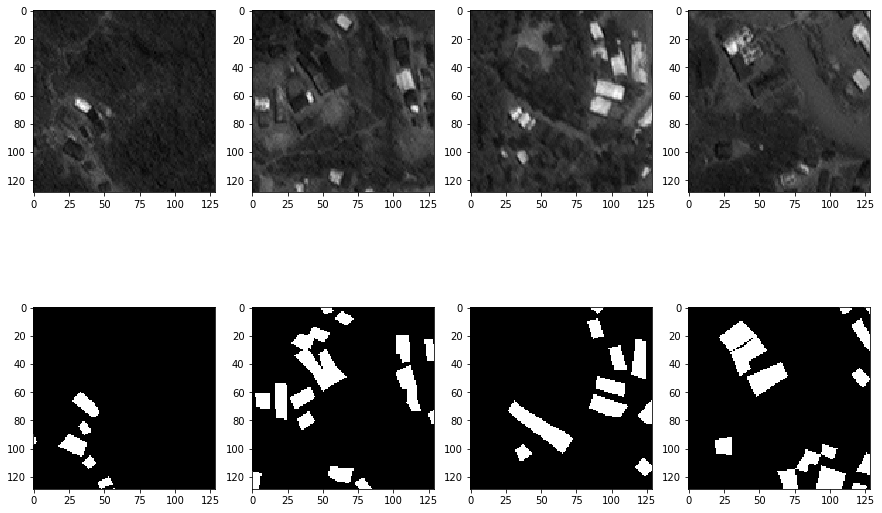

Loading done.
Saving to .npy files done.


In [10]:
create_train_data(data_path,showSample=True,showNumSample=4)

In [11]:
create_test_data(data_path)

Creating test images...
Dataset size: 10
Loading done.
Saving to .npy files done.


### Available models: 'unet','flatunet', 'unet64filters', or 'unet64batchnorm'

#### U-Net

[Original U-Net :](https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/u-net-architecture.png)
![U-Net](https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/u-net-architecture.png)

In [13]:
train_1 = T.train(data_path,'unet',number_of_epochs=3,batch_size=8,test_data_fraction=0.2,checkpoint_period=3)

Loading and preprocessing train data...
Creating and compiling model...
using model: unet
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
conv2d_39 (Conv2D)              (None, 128, 128, 32) 320         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_40 (Conv2D)              (None, 128, 128, 32) 9248        conv2d_39[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_9 (MaxPooling2D)  (None, 64, 64, 32)   0           conv2d_40[0][0]                  
___________________

Loss function : $$ \mathrm{ - Dice~Coeff.} = - \frac{2 |X \cap Y|}{|X| + |Y|} = - \frac{2 TP}{2TP + FP + FN}$$

Dice = 1  --> identical images,
Dice ~= 0  --> very dissimilar images.

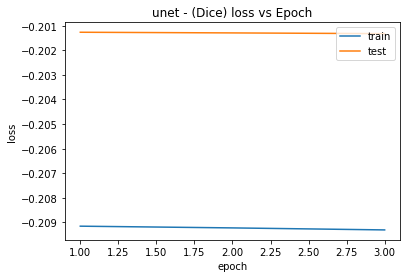

In [14]:
plot_loss_epoch(data_path+'/internal/checkpoints/','unet')
#plot_loss_epoch('/media/data/July20-2018/','unet')

In [ ]:
P.predict(data_path,'unet')

#### Mod U-Net 

[Original mod-U-net](https://deepsense.ai/wp-content/uploads/2017/04/architecture_details.png)
![Link: mod-U-net](https://deepsense.ai/wp-content/uploads/2017/04/architecture_details.png)

In [ ]:
train_2 = T.train(data_path,'flatunet',number_of_epochs=3,batch_size=1,test_data_fraction=0.2,checkpoint_period=1)

In [ ]:
plot_loss_epoch(data_path+'/internal/checkpoints/','flatunet')
#plot_loss_epoch('/media/data/July20-2018/','flatunet')

In [ ]:
P.predict(data_path,'flatunet')

#### "U-Net 64 filters" : all layers have 64 kernels 

In [16]:
train_3 = T.train(data_path,'unet64filters',number_of_epochs=3,batch_size=8,test_data_fraction=0.2,checkpoint_period=1)

Loading and preprocessing train data...
Creating and compiling model...
using model: unet64filters (unet but all kernels/filters made to be 64)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
conv2d_77 (Conv2D)              (None, 128, 128, 64) 640         input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_78 (Conv2D)              (None, 128, 128, 64) 36928       conv2d_77[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_17 (MaxPooling2D) (None, 64, 64, 64)   0          

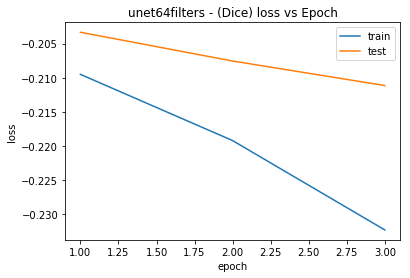

In [17]:
plot_loss_epoch(data_path+'/internal/checkpoints/','unet64filters')
# plot_loss_epoch('/media/data/July20-2018/','unet64filters')

In [ ]:
P.predict(data_path,'unet64filters')
#P.predict(data_path,'unet64filters',ckpt_path_=data_path+'/internal/checkpoints/')

#### "U-Net 64 batchnorm" : all layers have 64 kernels and batchnormalized 

In [ ]:
train_4 = T.train(data_path,'unet64batchnorm',number_of_epochs=3,batch_size=1,test_data_fraction=0.2,checkpoint_period=1)

In [ ]:
plot_loss_epoch(data_path+'/internal/checkpoints/','unet64batchnorm')
#plot_loss_epoch('/media/data/July20-2018/','unet64batchnorm')

In [ ]:
P.predict(data_path,'unet64batchnorm')
#P.predict(data_path,'unet64batchnorm',ckpt_path_='/media/data/July20-2018/')